In [1]:
# A Probabilistic DWave sampler that uses random sampling per number of solutions
# (c)2020 Alex Khan. All rights reserved 

In [53]:
def DWaveSamplerP(file_name,plot_limit):
    from itertools import combinations
    import numpy as np
    import pandas as pd
    import random
    import math
    import matplotlib.pyplot as plt
    
    def nCr(n,r):
        f = math.factorial
        return int(f(n) / f(r) / f(n-r))
    
    def random_combination(iterable, r):
        "Random selection from itertools.combinations(iterable, r)"
        pool = tuple(iterable)
        n = len(pool)
        indices = sorted(random.sample(range(n), r))
        return list(tuple(pool[i] for i in indices))
    
    def sum(i_list, Q):
        sum_l=0
        sum_q=0
        for i in (i_list):
            sum_l+=Q[i][i]
        for i in (i_list):
            for j in (i_list):
                if i<j:
                    sum_q+=Q[i][j]
            
        return(sum_l+sum_q)
    
    Q = pd.read_csv(file_name).values 
    N=len(Q[0])
    t= (2**N)-1
    
    e_min=9999999
    count=0
    min_list=[]
    plot_data=[]
    for n in range(1,N):  # for groups of items from 1 to N
        comb=nCr(N,n)
        #print('--m ', m, comb)
        if comb==1:
            combf=1
        elif comb>plot_limit*2:
            combf=plot_limit
        else:
            combf=int(comb/2)
        
        for i in range (combf):
            i_list=random_combination(range(N), n)
            plot_data.append(sum(list(i_list),Q))
            
            if sum(list(i_list),Q)<e_min:  

                    e_min=sum(list(i_list),Q)  
                    
                    min_list=list(i_list)
                    print(list(i_list), sum(list(i_list),Q))
            count+=1
    plt.plot(plot_data)
    plt.ylabel('weight with constraint')
    plt.show()
    print('File Name:', file_name)
    print('Best found:', min_list)
    print('Energy:', e_min)
    print('From:', count, ' samples')
    print('Possible solutions:', t)
    return

[14] 0.9926681509999999
[18] 0.09069946
[1, 2, 4, 20, 21, 24, 25, 27] -0.8550887949999995


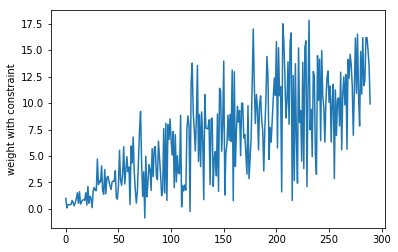

File Name: Q30.csv
Best found: [1, 2, 4, 20, 21, 24, 25, 27]
Energy: -0.8550887949999995
From: 290  samples
Possible solutions: 1073741823


In [56]:

FileName="Q30.csv"
DWaveSamplerP(FileName,10)


In [30]:
#Q3.csv [0, 1] -0.601334782
#Q5.csv [1, 4] -0.14307891899999997

#Q20.csv [0, 1, 2, 4, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19] -6.077951400999995 <---Bruteforce

#Q30.csv [1, 2, 3, 4, 7, 16, 18, 21, 23, 24, 25, 28, 29] -8.705486217  <----Bruteforce (so far)


In [40]:
#This section can be used to try different values

def value(i_list, file_name):
    import pandas as pd
    Q = pd.read_csv(file_name).values
    N=len(Q[0])
    t= (2**N)-1
    sum_l=0
    sum_q=0
    for i in (i_list):
        sum_l+=Q[i][i]
    for i in (i_list):
        for j in (i_list):
            if i<j:
                sum_q+=Q[i][j]

    return(sum_l+sum_q)
    


In [ ]:
#11111 00100 00100 01010 01111 10011 <-- Alan's answer
[0, 1, 2, 3, 4, 7, 12, 16, 18, 21, 22, 23, 24, 25, 28, 29]

In [42]:
value([0, 1, 2, 3, 4, 7, 12, 16, 18, 21, 22, 23, 24, 25, 28, 29],"Q30.csv")

-10.121011157999993

In [ ]:
#11111 10100 00110 01010 01111 10011] <- Hybrid solver

In [43]:
value([0, 1, 2, 3, 4, 5, 7, 12, 13, 16, 18, 21, 22, 23, 24, 25, 28, 29],"Q30.csv")

-10.002792734999995

In [ ]:
# 11111 00100 00100 01010 01111 10011  <-- Anneal function

In [55]:
value([0, 1, 2, 3, 4, 7, 12, 16, 18, 21, 22, 23, 24, 25, 28, 29],"Q30.csv")

-10.121011157999993